In [49]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

#파일 위치 미리 지정
input_video_path = "S#17 C#3 촬영본.mp4"
save_video_path = 'S#17 C#3 촬영본_output.mp4'

cap = cv2.VideoCapture(input_video_path)

#재생할 파일의 넓이와 높이
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#video controller
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(save_video_path, fourcc, 30, (int(width), int(height)))
position = []

with mp_face_mesh.FaceMesh(min_detection_confidence = 0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        
        # 포즈 주석을 이미지 위에 그립니다.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        frame_vector_x = []
        
        if results.multi_face_landmarks:            
            for idx, point in enumerate(results.multi_face_landmarks[0].landmark):
                height, width, _ = image.shape
                #cx, cy 자체가 좌표값. 2021년 이후로 x,y값만 알려주고 있음
                cx, cy = int(point.x * width), int(point.y * height)
                if idx in [0, 11, 12, 13, 14, 15, 16, 17]:
                    frame_vector_x.append(point.x)
                    cv2.circle(image, (cx, cy), 3, (0,255,0), -1) 
            # 점들의 x값들의 평균을 내어 1개의 값으로 저장. 
            my_array = np.array(frame_vector_x)
            position.append(my_array.mean())
        else:
            position.append(0)
                

        cv2.imshow('Face Mesh', image)
        out.write(image)
        if cv2.waitKey(1) & 0xFF == 27:  # 'Esc' 키를 누르면 종료
            break

# 정리 작업
cap.release()
out.release()
cv2.destroyAllWindows()

In [57]:
new_1 = []
for i in position:
    if i != 0:
        new_1.append(i)
        

In [59]:
len(new_1)

371

In [60]:
len(position)

1335

In [4]:
len(position[position!=0])

5936

In [5]:
5936/16

371.0

# 음향 조절

In [40]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [61]:
from pydub import AudioSegment
from pydub.playback import play

In [10]:
from pydub import AudioSegment
from pydub.playback import play

AudioSegment.converter = '/usr/local/bin/ffmpeg'

def adjust_lr_volume(audio_path, left_volume=1.0, right_volume=1.0):
    # 오디오 파일 로드
    sound = AudioSegment.from_file(audio_path)

    # 좌우 볼륨 조절
    sound = sound._spawn(sound.raw_data, overrides={
        "frame_rate": int(sound.frame_rate),
        "channels": 2
    })

    sound = sound.set_frame_rate(44100)  # 적절한 frame_rate로 설정 (원하는 값으로 변경 가능)
    sound = sound.set_channels(2)  # 스테레오로 설정

    left_channel = sound.split_to_mono()[0]
    right_channel = sound.split_to_mono()[1]

    left_channel = left_channel._spawn(left_channel.raw_data, overrides={
        "frame_rate": int(left_channel.frame_rate * left_volume),
    })

    right_channel = right_channel._spawn(right_channel.raw_data, overrides={
        "frame_rate": int(right_channel.frame_rate * right_volume),
    })

    sound = AudioSegment.from_mono_audiosegments(left_channel, right_channel)

    return sound

if __name__ == "__main__":
    input_audio_path = "S#17 후시녹음.wav"  # 음원 파일 경로를 적절히 수정하세요.

    # 좌우 볼륨 조절 (0.5는 절반 크기)
    adjusted_sound = adjust_lr_volume(input_audio_path, left_volume=0.5, right_volume=0.5)

    # 결과 저장
    adjusted_sound.export("output_audio.mp3", format="mp3")

    # 결과 재생 (재생 시에는 pydub.playback.play() 대신에 다른 재생 방법을 사용할 수 있습니다.)
    play(adjusted_sound)

Input #0, wav, from '/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/tmp671xi1ti.wav':
  Duration: 00:00:19.75, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 22050 Hz, 2 channels, s32, 1411 kb/s


In [7]:
audio = AudioSegment.from_wav('S#17 후시녹음.wav')
left_channel = audio.split_to_mono()[0]  # 왼쪽 채널
right_channel = audio.split_to_mono()[1]  # 오른쪽 채널

# 왼쪽 채널 강조
left_channel = left_channel + 10  # 예시로 10dB 강조

# 오른쪽 채널 약화
right_channel = right_channel - 10  # 예시로 10dB 약화

# 왼쪽과 오른쪽 채널을 다시 합칩니다.
modified_audio = AudioSegment.from_mono_audiosegments(left_channel, right_channel)

# 결과 오디오를 저장하거나 재생합니다.
modified_audio.export("modified_audio.mp3", format="mp3")
play(modified_audio)

Input #0, wav, from '/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/tmpbnutns4h.wav':
  Duration: 00:00:09.88, bitrate: 3072 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s32, 3072 kb/s


In [8]:
# 각 프레임에 대해 왼쪽과 오른쪽 채널을 조절하는 예시. 
from pydub import AudioSegment

def adjust_sound_by_time(input_file, output_file):
    # 오디오 파일 읽기
    audio = AudioSegment.from_file(input_file)

    # 시간에 따라 왼쪽과 오른쪽 사운드를 다르게 조절
    for i in range(len(audio)):
        # 예시로 1초마다 왼쪽은 -5dB, 오른쪽은 +5dB 조절
        left_channel = audio[i].split_to_mono()[0] - 5
        right_channel = audio[i].split_to_mono()[1] + 5

        # 왼쪽과 오른쪽 채널을 다시 합치기
        modified_audio = AudioSegment.from_mono_audiosegments(left_channel, right_channel)

        # 조절된 오디오를 원래 위치에 덮어쓰기
        audio = audio.overlay(modified_audio, position=i)

    # 조절된 오디오를 새로운 파일로 내보내기
    audio.export(output_file, format="mp3")

# 사용 예시
input_file = "S#17 후시녹음.wav"
output_file = "output_audio_adjusted.mp3"
adjust_sound_by_time(input_file, output_file)

In [9]:
len(audio)

9877

In [12]:
from pydub import AudioSegment

def adjust_sound_by_x_coordinate(input_file, output_file):
    # 오디오 파일 읽기
    audio = AudioSegment.from_file(input_file)

    # 주어진 x 좌표 값에 따라 왼쪽과 오른쪽 사운드를 조절
    for i in range(len(audio)):
        # 예시로 x 좌표 값이 50일 때, 오른쪽은 +5dB, 왼쪽은 -5dB 조절
        x_coordinate = 50  # 예시 값, 실제로는 적절한 x 좌표 값을 사용해야 합니다.
        adjustment = (x_coordinate - i) / 10  # 예시로 x 좌표 값과 프레임 위치에 따라 조절값 계산

        left_channel = audio[i].split_to_mono()[0] - adjustment
        right_channel = audio[i].split_to_mono()[1] + adjustment

        # 왼쪽과 오른쪽 채널을 다시 합치기
        modified_audio = AudioSegment.from_mono_audiosegments(left_channel, right_channel)

        # 조절된 오디오를 원래 위치에 덮어쓰기
        audio = audio.overlay(modified_audio, position=i)

    # 조절된 오디오를 새로운 파일로 내보내기
    audio.export(output_file, format="mp3")

# 사용 예시
input_file = "S#17 후시녹음.wav"
output_file = "output_audio_adjusted_by_x.mp3"
adjust_sound_by_x_coordinate(input_file, output_file)

In [19]:
# 표시상 9초
audio = AudioSegment.from_file(input_file)
len(audio)

9877

In [62]:
#표시상 4초
audio = AudioSegment.from_file('S#17 C#3 후시녹음.wav')
len(audio) 

4238

In [64]:
audio

In [18]:
total_duration = len(audio) / 480  # 샘플링 레이트로 나누어서 시간으로 변환
print("Total duration:", total_duration, "seconds")

Total duration: 20.577083333333334 seconds


In [16]:
audio.frame_rate

48000

In [67]:
len(position)

1335

In [74]:
44*30

1320

In [125]:
1/44*1320

30.0

In [123]:
real_position = position[720:1100]
real_position

[0,
 0,
 0.3525012172758579,
 0.33940402790904045,
 0.32506609708070755,
 0.3079763241112232,
 0.28934455662965775,
 0.26893145591020584,
 0.24852763675153255,
 0.22987398877739906,
 0.21326647698879242,
 0.19920839183032513,
 0.18674185127019882,
 0.17572959698736668,
 0.1651958990842104,
 0.15829552337527275,
 0.1527127232402563,
 0.14832199551165104,
 0.1445434745401144,
 0.14141699858009815,
 0.13935436867177486,
 0.13803979195654392,
 0.13712710700929165,
 0.1372253242880106,
 0.1377732064574957,
 0.1392277330160141,
 0.14114617928862572,
 0.14314739033579826,
 0.14586739614605904,
 0.14873515255749226,
 0.15235823020339012,
 0.15681261010468006,
 0.16285374946892262,
 0.17088017240166664,
 0.18028556928038597,
 0.1901735421270132,
 0.1985792461782694,
 0.2076862957328558,
 0.21423183009028435,
 0.21993486769497395,
 0.22474469244480133,
 0.22895619086921215,
 0.23141014203429222,
 0.2337148431688547,
 0.23662418127059937,
 0.23869452439248562,
 0.24112355709075928,
 0.24375574104

In [143]:
1100-720

380

In [129]:
real_position

[0,
 0,
 0.3525012172758579,
 0.33940402790904045,
 0.32506609708070755,
 0.3079763241112232,
 0.28934455662965775,
 0.26893145591020584,
 0.24852763675153255,
 0.22987398877739906,
 0.21326647698879242,
 0.19920839183032513,
 0.18674185127019882,
 0.17572959698736668,
 0.1651958990842104,
 0.15829552337527275,
 0.1527127232402563,
 0.14832199551165104,
 0.1445434745401144,
 0.14141699858009815,
 0.13935436867177486,
 0.13803979195654392,
 0.13712710700929165,
 0.1372253242880106,
 0.1377732064574957,
 0.1392277330160141,
 0.14114617928862572,
 0.14314739033579826,
 0.14586739614605904,
 0.14873515255749226,
 0.15235823020339012,
 0.15681261010468006,
 0.16285374946892262,
 0.17088017240166664,
 0.18028556928038597,
 0.1901735421270132,
 0.1985792461782694,
 0.2076862957328558,
 0.21423183009028435,
 0.21993486769497395,
 0.22474469244480133,
 0.22895619086921215,
 0.23141014203429222,
 0.2337148431688547,
 0.23662418127059937,
 0.23869452439248562,
 0.24112355709075928,
 0.24375574104

In [127]:
len(real_position[60:])

320

In [1]:
30 * 33

990

In [76]:
1100/1320*44

36.66666666666667

In [104]:
new_1

[0.3525012172758579,
 0.33940402790904045,
 0.32506609708070755,
 0.3079763241112232,
 0.28934455662965775,
 0.26893145591020584,
 0.24852763675153255,
 0.22987398877739906,
 0.21326647698879242,
 0.19920839183032513,
 0.18674185127019882,
 0.17572959698736668,
 0.1651958990842104,
 0.15829552337527275,
 0.1527127232402563,
 0.14832199551165104,
 0.1445434745401144,
 0.14141699858009815,
 0.13935436867177486,
 0.13803979195654392,
 0.13712710700929165,
 0.1372253242880106,
 0.1377732064574957,
 0.1392277330160141,
 0.14114617928862572,
 0.14314739033579826,
 0.14586739614605904,
 0.14873515255749226,
 0.15235823020339012,
 0.15681261010468006,
 0.16285374946892262,
 0.17088017240166664,
 0.18028556928038597,
 0.1901735421270132,
 0.1985792461782694,
 0.2076862957328558,
 0.21423183009028435,
 0.21993486769497395,
 0.22474469244480133,
 0.22895619086921215,
 0.23141014203429222,
 0.2337148431688547,
 0.23662418127059937,
 0.23869452439248562,
 0.24112355709075928,
 0.24375574104487896,


In [111]:
import scipy

In [146]:
len(position)

1335

In [149]:
(26+4.2)/44.5*1335

905.9999999999999

In [151]:
sound_position = position[780:906]
len(sound_position)

126

In [160]:
actual_sound_position =[]
for i in sound_position:
    for j in range(33):
        actual_sound_position.append(i)
        
len(actual_sound_position)

4158

In [153]:
4238/126

33.63492063492063

In [161]:
4238-4158

80

In [162]:
for i in range(40):
    actual_sound_position.insert(0,0)
    actual_sound_position.append(0)

In [163]:
len(actual_sound_position)

4238

In [164]:
from pydub import AudioSegment
from pydub.playback import play

AudioSegment.converter = '/usr/local/bin/ffmpeg'

def adjust_sound_by_coordinates(input_file, output_file, coordinates):
    # 오디오 파일 읽기
    audio = AudioSegment.from_file(input_file)

    # 좌표 값에 따라 왼쪽과 오른쪽 사운드를 조절
    for i in range(len(audio)):
        # 예시로 x 좌표 값과 프레임 위치에 따라 조절값 계산
        x_coordinate = coordinates[i]
        adjustment = (x_coordinate - 0.5) * 10   # 예시로 x 좌표 값과 프레임 위치에 따라 조절값 계산

        left_channel = audio[i].split_to_mono()[0] - adjustment
        right_channel = audio[i].split_to_mono()[1] + adjustment

        # 왼쪽과 오른쪽 채널을 다시 합치기
        modified_audio = AudioSegment.from_mono_audiosegments(left_channel, right_channel)

        # 조절된 오디오를 원래 위치에 덮어쓰기
        audio = audio.overlay(modified_audio, position=i)

    # 조절된 오디오를 새로운 파일로 내보내기
    audio.export(output_file, format="mp3")

# 사용 예시
input_file = "S#17 C#3 후시녹음.wav"
output_file = "S#17 C#3 후시녹음_output_audio_coordinates.mp3"
coordinates = actual_sound_position  # 실제 좌표 값으로 변경
adjust_sound_by_coordinates(input_file, output_file, coordinates)


In [159]:
audio[100:1000]

In [145]:
play(audio)

Input #0, wav, from '/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/tmpvv8hg9mg.wav':
  Duration: 00:00:04.24, bitrate: 3072 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s32, 3072 kb/s


In [101]:
len(audio)

4238

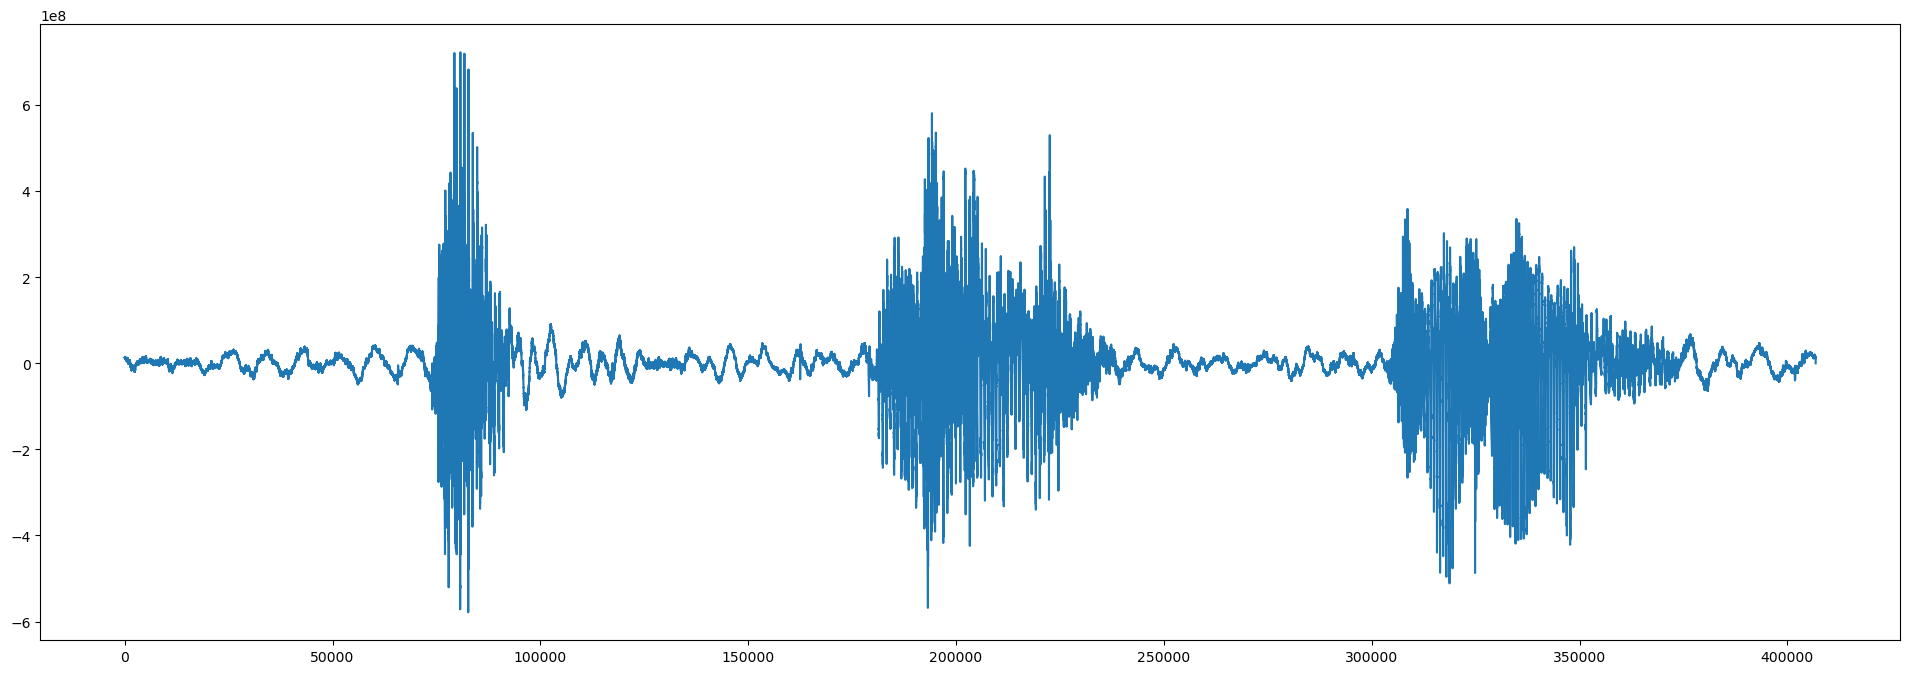

In [166]:
import matplotlib.pyplot as plt
def plot_waveform(audio_file):
    # 오디오 파일 로드
    audio = AudioSegment.from_file(audio_file)

    # 오디오 데이터 추출
    samples = audio.get_array_of_samples()
    
    # 그래프 크기 조절
    plt.figure(figsize = (24,8))

    # 파형 그래프 생성
    plt.plot(samples)

    # 그래프 표시
    plt.show()
    
plot_waveform('S#17 C#3 후시녹음.wav')

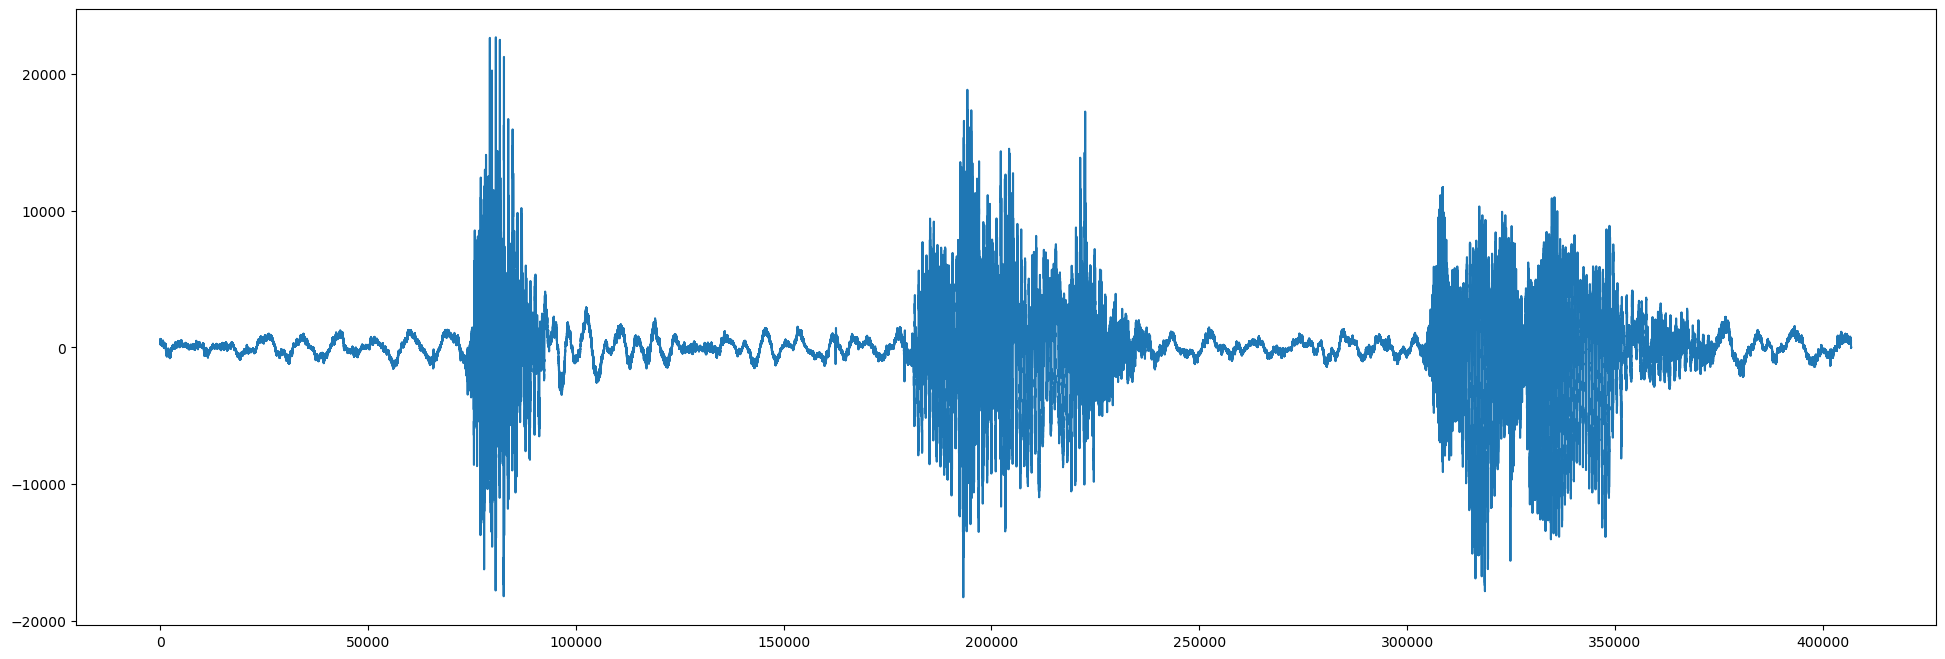

In [167]:
plot_waveform('S#17 C#3 후시녹음_output_audio_coordinates.mp3')